# Part 4. Machine Learning - Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./df_preparedCLIM.csv')

In [3]:
df.head()

,TRAFFIC_LANES_ON_028A,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,...,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,MAINTENANCE_021_otherA,MAINTENANCE_021_stateHA,MAINTENANCE_021_tollA,MAINTENANCE_021_town_cityHA,DETERIORATION_RATE,elevation
0,2,31,3,27.7,84.1,7.9,1,65.0,1,0.0,...,-96.000334,42.589667,1,1,0,0,0,1,0.235294,400.590332
1,4,0,3,24.4,70.1,17.9,1,49.0,1,0.0,...,-93.377501,42.010502,0,1,0,0,0,1,0.047059,296.377899
2,4,0,3,20.7,63.4,20.6,1,62.0,1,0.0,...,-93.378668,42.013667,0,1,0,0,0,1,0.164706,307.136780
3,2,30,3,16.2,43.3,8.3,1,32.0,1,0.0,...,-94.456503,41.266668,0,0,0,0,0,1,0.101852,410.830414
4,2,20,3,21.0,63.1,9.1,1,51.0,1,0.0,...,-95.001836,41.247000,0,1,0,0,0,1,0.125000,380.345337


In [4]:
print('We will work with a bridge dataset made of %d entries' %df.shape[0])

We will work with a bridge dataset made of 21036 entries


In [5]:
# The dependent feature we want to predict is the deterioration rate

df['DETERIORATION_RATE'].describe()

count    2.103600e+04
mean     9.640830e-02
std      6.921435e-02
min      5.224579e-17
25%      4.705882e-02
50%      8.235294e-02
75%      1.274510e-01
max      8.974359e-01
Name: DETERIORATION_RATE, dtype: float64

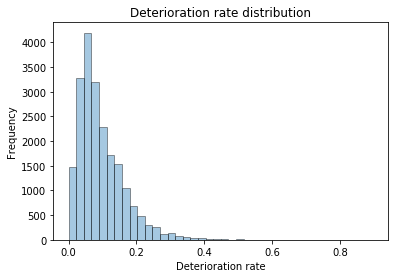

In [6]:
sns.distplot(df['DETERIORATION_RATE'], kde = False, bins = 40, hist_kws=dict(edgecolor="k"))
plt.title('Deterioration rate distribution')
plt.xlabel('Deterioration rate')
plt.ylabel('Frequency')
plt.show()

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions, because there is a long tail in the positive direction on the number line. 

The mean (0.096) is placed to the right (i.e. higher than) of the median (0.082).

## Find correlations 

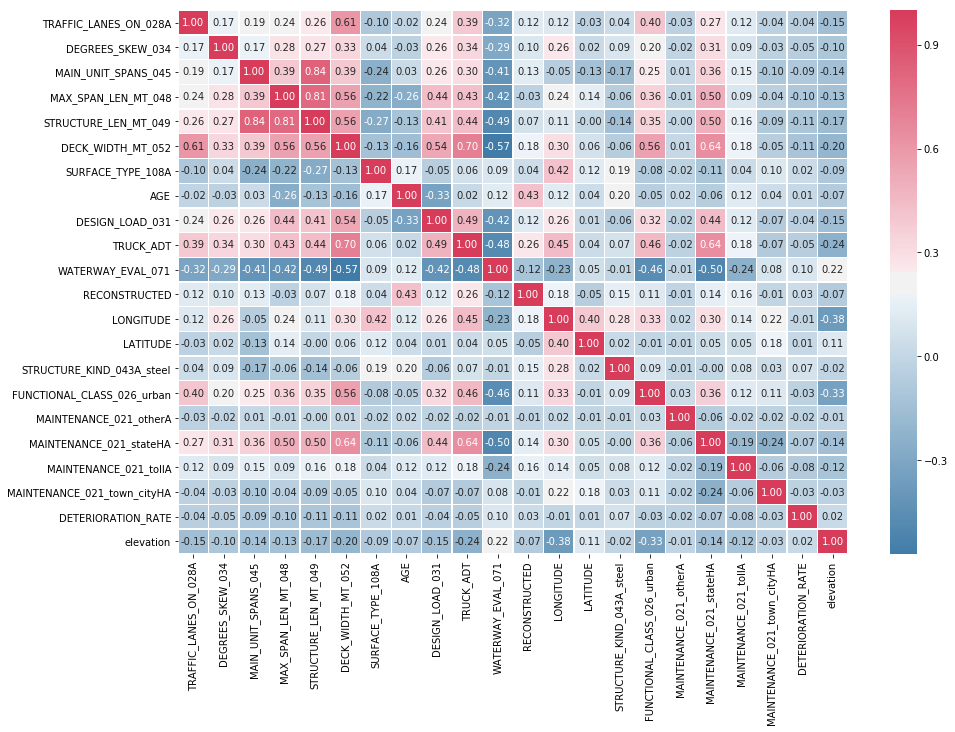

In [7]:
corr_matrix = df.corr('spearman')
fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(240,5, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

We can observe some correlations between the deterioration rate and deck width, span lengths, surface type and state highway agency maintenance. 

We can also see some strong correlations between independent variables. For instance: 

     - Structure length has a correlation of 84% with the number of spans and the maximum span length. 
     
     - Traffic lanes and deck width have a 61% correlation, which is evident since the bridge will be wider when increasing the number of lanes on it.
     
We will have to drop some of the variables that are strongly correlated between them. Since the number of spans and the number of traffic lanes are less correlated with the deterioration rate, they will be dropped from our dataframe. 

In [8]:
col_drop = ['TRAFFIC_LANES_ON_028A','MAIN_UNIT_SPANS_045']

In [9]:
df.drop(col_drop, axis =1, inplace = True)

## Feature scaling

In [10]:
df.columns

Index(['DEGREES_SKEW_034', 'MAX_SPAN_LEN_MT_048', 'STRUCTURE_LEN_MT_049',
       'DECK_WIDTH_MT_052', 'SURFACE_TYPE_108A', 'AGE', 'DESIGN_LOAD_031',
       'TRUCK_ADT', 'WATERWAY_EVAL_071', 'RECONSTRUCTED', 'LONGITUDE',
       'LATITUDE', 'STRUCTURE_KIND_043A_steel', 'FUNCTIONAL_CLASS_026_urban',
       'MAINTENANCE_021_otherA', 'MAINTENANCE_021_stateHA',
       'MAINTENANCE_021_tollA', 'MAINTENANCE_021_town_cityHA',
       'DETERIORATION_RATE', 'elevation'],
      dtype='object')

In [11]:
# We choose the columns we want to scale

col_norm = ['DEGREES_SKEW_034',
            'MAX_SPAN_LEN_MT_048',
             'STRUCTURE_LEN_MT_049',
             'DECK_WIDTH_MT_052',
             'AGE',
             'TRUCK_ADT',
             'LONGITUDE',
             'LATITUDE',
             'elevation']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in col_norm:
    df[col] = scaler.fit_transform(df[[col]].values)


/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
df.describe()

,DEGREES_SKEW_034,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,WATERWAY_EVAL_071,RECONSTRUCTED,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,MAINTENANCE_021_otherA,MAINTENANCE_021_stateHA,MAINTENANCE_021_tollA,MAINTENANCE_021_town_cityHA,DETERIORATION_RATE,elevation
count,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,21036.000000,2.103600e+04,21036.000000
mean,0.139063,0.161443,0.195464,0.027456,1.304763,0.437872,1.407682,0.028048,1.097072,0.276764,0.588775,0.496454,0.867846,0.297205,0.005087,0.410915,0.047870,0.076726,9.640830e-02,0.248818
std,0.171343,0.097850,0.180056,0.022183,0.486331,0.231675,0.775661,0.073960,0.847086,0.447409,0.278608,0.185331,0.338667,0.457038,0.071140,0.492011,0.213497,0.266162,6.921435e-02,0.104286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.224579e-17,0.000000
25%,0.000000,0.085687,0.046956,0.014930,1.000000,0.253165,1.000000,0.000000,0.000000,0.000000,0.296538,0.339110,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.705882e-02,0.192488
50%,0.050505,0.143126,0.155831,0.021234,1.000000,0.443038,2.000000,0.001833,1.000000,0.000000,0.646532,0.468540,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.235294e-02,0.241816
75%,0.272727,0.211864,0.291022,0.032515,2.000000,0.582278,2.000000,0.019730,2.000000,1.000000,0.856768,0.617791,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.274510e-01,0.292345
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.974359e-01,1.000000


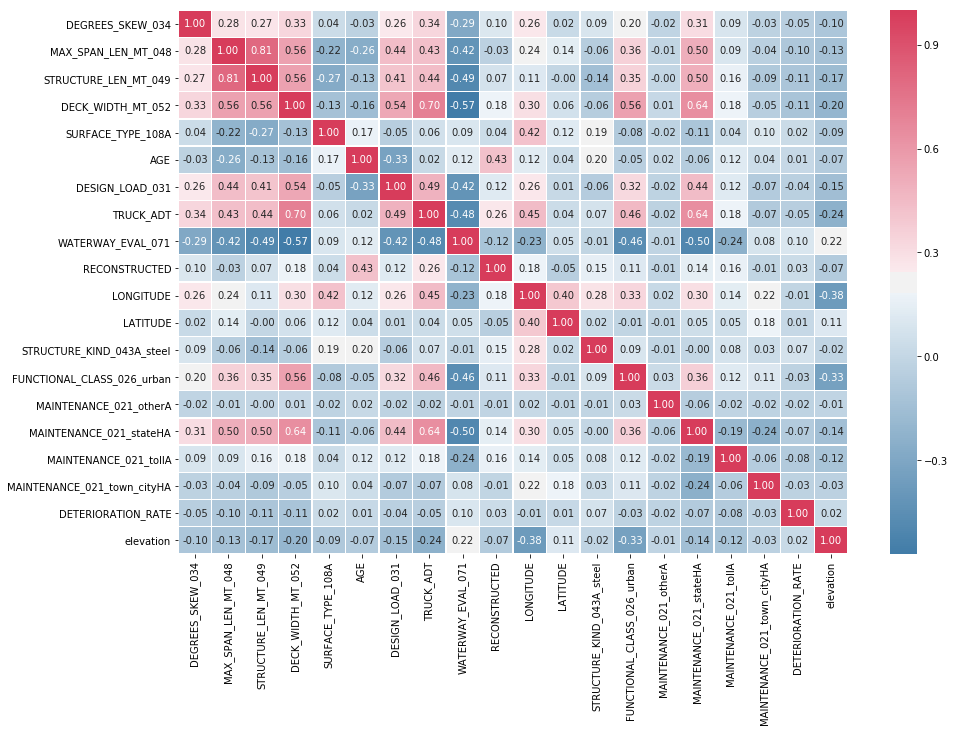

In [13]:
corr_matrix = df.corr('spearman')
fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(240,5, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

In [14]:
# Shuffle our dataframe first since bridges are ordered by state code in the df

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
# Data Preparation
X = df[[
       'DEGREES_SKEW_034', 'MAX_SPAN_LEN_MT_048', 'STRUCTURE_LEN_MT_049',
       'DECK_WIDTH_MT_052', 'SURFACE_TYPE_108A', 'AGE', 'DESIGN_LOAD_031',
       'TRUCK_ADT', 'WATERWAY_EVAL_071', 'RECONSTRUCTED', 'LONGITUDE',
       'LATITUDE', 'STRUCTURE_KIND_043A_steel', 'FUNCTIONAL_CLASS_026_urban',
       'MAINTENANCE_021_otherA', 'MAINTENANCE_021_stateHA',
       'MAINTENANCE_021_tollA', 'MAINTENANCE_021_town_cityHA',
       'elevation']] 

y = df['DETERIORATION_RATE'] 

## Principal Component Analysis

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

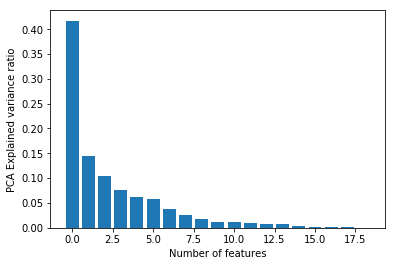

In [17]:
# Number of PCA components

ran = range(pca.n_components_)
plt.bar(ran, pca.explained_variance_ratio_)

plt.xlabel('Number of features')
plt.ylabel('PCA Explained variance ratio')
plt.show()

One of the features we have un the dataset is necessary for deterioration prediction. Two more features also have quite some importance in accounting for most of the variance in the dataset.

Since we only have 19 features, which doesn't make our dataset very high dimensional, we will keep all the features as they are.

## Model selection

We will use regression models to predict the deterioration rates since we are dealing with a continuous variable.

Please note that the independent variables we want to use to predict the deterioration rate are not very well suited to regression since most of the features are discrete variables. We have converted the label of each of those features into dummy variables in the previous notebook in order to fit them into regression models.

### Train-test split

In [18]:
# Split into train and test

from sklearn.model_selection import train_test_split

In [19]:
print('The original dataset (before splitting) has %d rows' %X.shape[0])

The original dataset (before splitting) has 21036 rows


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

In [22]:
print('We will train our models with %d ' %X_train.shape[0])

We will train our models with 17880 


### Mean model

In [23]:
# The mean model is the simplest prediction that can be made
# It predicts the average of the labels in the training data

pred_mean = y_train.mean()

In [24]:
dfr=pd.DataFrame()
dfr['y_real'] = y_train
dfr['y_pred1'] = pred_mean

In [25]:
# If we want to compare this "prediction" of the mean with the test data, 
# We first have to chunk the "prediction" serie to the test data size


pred_chunk = dfr['y_pred1'][:y_test.shape[0]]

In [26]:
# Mean Absolute Error for mean model

from sklearn.metrics import mean_absolute_error

mae_mean = mean_absolute_error(y_test,pred_chunk)
print('Mean model: MAE = %.5f' %mae_mean)

Mean model: MAE = 0.05198


In [27]:
# Mean Squared Error for mean model

from sklearn.metrics import mean_squared_error

rmse_mean = np.sqrt(mean_squared_error(y_test,pred_chunk))
print('Mean model: RMSE = %.5f' %rmse_mean)

Mean model: RMSE = 0.06923


### Linear regression

In [28]:
# Linear regression is the benchmark in a regression problem

from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()

In [29]:
reg_lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred_reg_lin = reg_lin.predict(X_test)

In [31]:
# Mean Absolute Error

mae_reg_lin = mean_absolute_error(y_test,y_pred_reg_lin)
print('Linear regression model: MAE = %.5f' %mae_reg_lin)

Linear regression model: MAE = 0.05085


In [32]:
# Mean Squared Error

rmse_reg_lin = np.sqrt(mean_squared_error(y_test, y_pred_reg_lin))
print('Linear model: RMSE = %.5f' %rmse_reg_lin)

Linear model: RMSE = 0.06813


In [72]:
# R2 score

from sklearn.metrics import r2_score
r2_reg_lin = r2_score(y_test, y_pred_reg_lin)
print('Linear model: R2 score = %.5f' %r2_reg_lin)

Linear model: R2 score = 0.03142


R2 score is very low, which means that the features we are using as indepedent variables do not explain properly the deterioration rate of the bridges.

Let's create a comparative table for metrics between the different models we will be evaluating

In [73]:
metrics = {'Metric': ['MAE', 'RMSE', 'R2_score'], 
              'Mean model': [mae_mean, rmse_mean, '-'],
              'Linear regression': [mae_reg_lin, rmse_reg_lin,r2_reg_lin]}
df_metrics = pd.DataFrame(data=metrics)
df_metrics

,Metric,Mean model,Linear regression
0,MAE,0.0519841,0.050852
1,RMSE,0.0692285,0.068132
2,R2_score,-,0.031417


Both MAE and RMSE decrease with the linear regression model compared to the mean model. The fit of the linear regression model is better than the fit of the mean model.

In [35]:
# Feature importance

reg_lin_feature_list = pd.DataFrame(list(zip(X.columns,np.abs(reg_lin.coef_))), columns = ['Feature','Importance'])
reg_lin_feature_list.sort_values(by='Importance', ascending = False).reset_index(drop=True)

,Feature,Importance
0,DECK_WIDTH_MT_052,0.142577
1,MAINTENANCE_021_tollA,0.036269
2,MAINTENANCE_021_otherA,0.023783
3,MAX_SPAN_LEN_MT_048,0.020241
4,MAINTENANCE_021_town_cityHA,0.020152
5,MAINTENANCE_021_stateHA,0.016243
6,LONGITUDE,0.015305
7,TRUCK_ADT,0.014664
8,RECONSTRUCTED,0.013579
9,STRUCTURE_KIND_043A_steel,0.012559


It seems that deck width is one the features that most influence the deterioration rate. 

We also can see the importance of the maintenance responsability of the bridge, which is very related to the amount of funds that each agency gives to the maintenance and repair of their insfrastructures.

### Ridge regularization

The Ridge regularization modifies the objetive function of the linear regression model by adding a penalizing term whose value is higher when the model is more complex. 

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [37]:
ridge = GridSearchCV(Ridge(),param_grid={"alpha": (0.01,0.1,0.05,1,2,5,10,20,50)},cv = 5, scoring = 'neg_mean_squared_error')
ridge.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': (0.01, 0.1, 0.05, 1, 2, 5, 10, 20, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [38]:
ridge.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
ridge_final = ridge.best_estimator_

mae_ridge = mean_absolute_error(y_test,ridge_final.predict(X_test))
rmse_ridge = np.sqrt(mean_squared_error(y_test,ridge_final.predict(X_test)))
r2_ridge = r2_score(y_test, ridge_final.predict(X_test))

print('Ridge model: MAE = %.5f' %mae_ridge)
print('Ridge model: RMSE = %.5f' %rmse_ridge)
print('Ridge model: R2 score = %.5f' %r2_ridge)

df_metrics['Ridge regression']= pd.Series([mae_ridge, rmse_ridge, r2_ridge])
df_metrics

Ridge model: MAE = 0.05084
Ridge model: RMSE = 0.06813
Ridge model: R2 score = 0.03146


,Metric,Mean model,Linear regression,Ridge regression
0,MAE,0.0519841,0.050852,0.050837
1,RMSE,0.0692285,0.068132,0.068131
2,R2_score,-,0.031417,0.031457


The Cross-Validated Ridge regression performs just as the linear regression. That is one of the reasons why Ridge regression performs better with higher dimensional data.

The amount of regularization we are doing is relatively low.

###  Elastic Net

In [40]:
from sklearn.linear_model import ElasticNet

enet= GridSearchCV(ElasticNet(), param_grid={
                      'alpha': [  0.01, 0.1, 1],
                      'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}, 
                  cv =5, scoring='neg_mean_squared_error')

enet.fit(X_train, y_train) 

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
enet.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

l1_ration = 0 means the model is adjusting to a Ridge regression and not combining the model with Lasso regularization. 

We will try Ensemble  models to see if we can improve the results obtained with the linear and Ridge regressions.

### Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

gbreg = GridSearchCV(GradientBoostingRegressor(n_estimators=50),
                  param_grid={"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring="neg_mean_squared_error",
                  cv=5)

gbreg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [56]:
gbreg.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=9, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [75]:
gbreg_final = gbreg.best_estimator_

mae_gbreg = mean_absolute_error(y_test,gbreg_final.predict(X_test))
rmse_gbreg = np.sqrt(mean_squared_error(y_test,gbreg_final.predict(X_test)))
r2_gbreg = r2_score(y_test,gbreg_final.predict(X_test))

print('Gradient Boosting model: MAE = %.5f' %mae_gbreg)
print('Gradient Boosting model: RMSE = %.5f' %rmse_gbreg)
print('Gradient Boosting model: R2 score = %.5f' %r2_gbreg)

df_metrics['Gradient Boosting']= pd.Series([mae_gbreg, rmse_gbreg, r2_gbreg])
df_metrics

Gradient Boosting model: MAE = 0.04608
Gradient Boosting model: RMSE = 0.06376
Gradient Boosting model: R2 score = 0.15176


,Metric,Mean model,Linear regression,Ridge regression,Gradient Boosting
0,MAE,0.0519841,0.050852,0.050837,0.046076
1,RMSE,0.0692285,0.068132,0.068131,0.063759
2,R2_score,-,0.031417,0.031457,0.151760


In [61]:
# Feature importance
gbreg_feature_list = pd.DataFrame(list(zip(X.columns,gbreg_final.feature_importances_)), columns = ['Feature','Importance'])
gbreg_feature_list.sort_values(by='Importance', ascending = False).reset_index(drop=True)

,Feature,Importance
0,LONGITUDE,0.217064
1,LATITUDE,0.162094
2,elevation,0.108290
3,DECK_WIDTH_MT_052,0.090444
4,STRUCTURE_LEN_MT_049,0.086600
5,AGE,0.084769
6,TRUCK_ADT,0.070684
7,MAX_SPAN_LEN_MT_048,0.061423
8,DEGREES_SKEW_034,0.035123
9,RECONSTRUCTED,0.015672


### Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = GridSearchCV(RandomForestRegressor(random_state=42),
                  param_grid={"max_depth":np.arange(2,10),
                             'min_samples_leaf' : (2,4),
                             'n_estimators': (50, 100, 200, 500, 1000)},
                  scoring="neg_mean_squared_error",
                  cv=5)

rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': (2, 4), 'n_estimators': (50, 100, 200, 500, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [64]:
rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [76]:
rf_final = rf.best_estimator_

mae_rf = mean_absolute_error(y_test,rf_final.predict(X_test))
rmse_rf = np.sqrt(mean_squared_error(y_test,rf_final.predict(X_test)))
r2_rf = r2_score(y_test,rf_final.predict(X_test))

print('Gradient Boosting model: MAE = %.5f' %mae_rf)
print('Gradient Boosting model: RMSE = %.5f' %rmse_rf)
print('Gradient Boosting model: R2 score = %.5f' %r2_rf)


df_metrics['Random Forest']= pd.Series([mae_rf, rmse_rf,r2_rf])
df_metrics

Gradient Boosting model: MAE = 0.04635
Gradient Boosting model: RMSE = 0.06358
Gradient Boosting model: R2 score = 0.15648


,Metric,Mean model,Linear regression,Ridge regression,Gradient Boosting,Random Forest
0,MAE,0.0519841,0.050852,0.050837,0.046076,0.046351
1,RMSE,0.0692285,0.068132,0.068131,0.063759,0.063581
2,R2_score,-,0.031417,0.031457,0.151760,0.156483


In [67]:
# Feature importance
rf_feature_list = pd.DataFrame(list(zip(X.columns,rf_final.feature_importances_)), columns = ['Feature','Importance'])
rf_feature_list.sort_values(by='Importance', ascending = False).reset_index(drop=True)

,Feature,Importance
0,LONGITUDE,0.281908
1,LATITUDE,0.134534
2,DECK_WIDTH_MT_052,0.113090
3,STRUCTURE_LEN_MT_049,0.095265
4,AGE,0.083091
5,elevation,0.079835
6,MAX_SPAN_LEN_MT_048,0.052365
7,TRUCK_ADT,0.048428
8,DEGREES_SKEW_034,0.021430
9,MAINTENANCE_021_tollA,0.020618
